--- Expectation-Maximization (Gaussian Mixture Model) Results ---
Number of Iterations to Converge: 11
Final Log-Likelihood: -4.4373

Model Parameters (Estimated by EM):
Means of first 5 features:
[[-0.04  0.79  0.27 -0.    0.19]
 [-0.02 -1.27 -0.13 -0.08 -0.28]
 [ 0.34  0.08 -0.85 -0.75 -0.27]
 [ 0.86  0.31 -1.82  2.37  0.77]
 [-0.28  0.63 -0.9   0.73 -0.3 ]]
Weights of Components: [0.55 0.36 0.05 0.02 0.02]

Cluster Assignment Comparison (True Categories vs GMM Clusters):
GMM Cluster      0    1   2  3   4
True Category                     
0              309  207   4  3  10
1               10    3   5  2   0
2                3    2   7  0   0
3                0    0  13  8   3

Sample Responsibilities (First 3 samples):
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


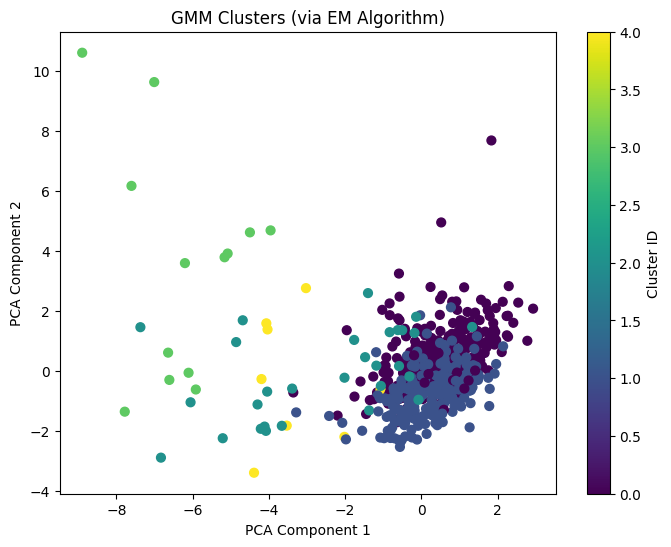

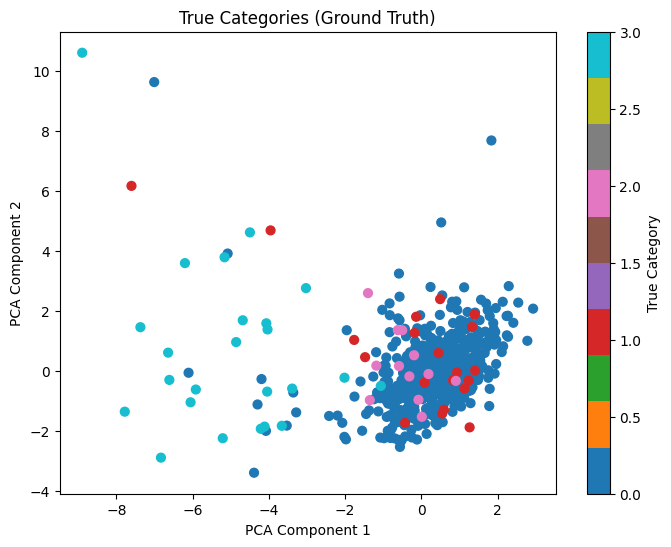

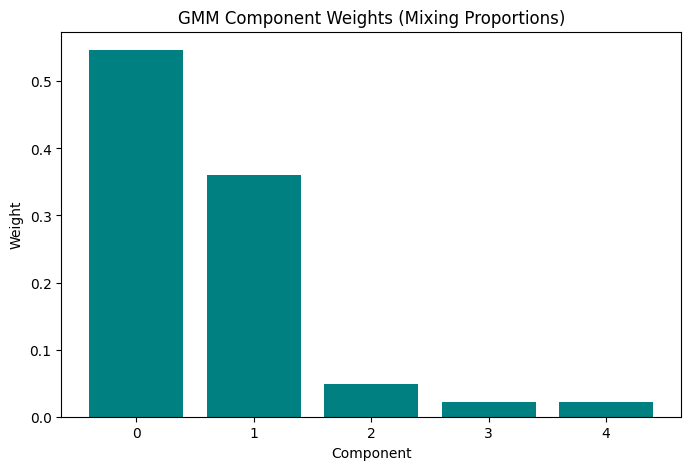

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('HepatitisCdata.csv', index_col=0)
except FileNotFoundError:
    print("Please ensure 'HepatitisCdata.csv' is uploaded.")
    exit()

df = df.replace('?', np.nan)
for col in ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']:
 df[col] = pd.to_numeric(df[col])
df = df.dropna()
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})
df['Category'] = df['Category'].str.replace('0s=', '0=').str.split('=').str[0].astype(int)

X = df.drop('Category', axis=1)
y_true = df['Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 5
gmm = GaussianMixture(n_components=n_components, random_state=42, max_iter=100)
gmm.fit(X_scaled)

gmm_clusters = gmm.predict(X_scaled)
responsibilities = gmm.predict_proba(X_scaled)

print("--- Expectation-Maximization (Gaussian Mixture Model) Results ---")
print(f"Number of Iterations to Converge: {gmm.n_iter_}")
print(f"Final Log-Likelihood: {gmm.lower_bound_:.4f}")
print("\nModel Parameters (Estimated by EM):")
print(f"Means of first 5 features:\n{gmm.means_[:, :5].round(2)}")
print(f"Weights of Components: {gmm.weights_.round(2)}")
print("\nCluster Assignment Comparison (True Categories vs GMM Clusters):")
print(pd.crosstab(y_true, gmm_clusters, rownames=['True Category'], colnames=['GMM Cluster']))

print(f"\nSample Responsibilities (First 3 samples):\n{responsibilities[:3].round(4)}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_clusters, cmap='viridis', s=40)
plt.title("GMM Clusters (via EM Algorithm)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster ID')
plt.show()
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='tab10', s=40)
plt.title("True Categories (Ground Truth)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='True Category')
plt.show()
plt.figure(figsize=(8,5))
plt.bar(range(n_components), gmm.weights_, color='teal')
plt.title("GMM Component Weights (Mixing Proportions)")
plt.xlabel("Component")
plt.ylabel("Weight")
plt.show()
